# [ChatPromptTemplate](https://python.langchain.com/api_reference/core/prompts/langchain_core.prompts.chat.ChatPromptTemplate.html#chatprompttemplate)
> ChatPromptTemplate → "역할 기반 대화 구조"

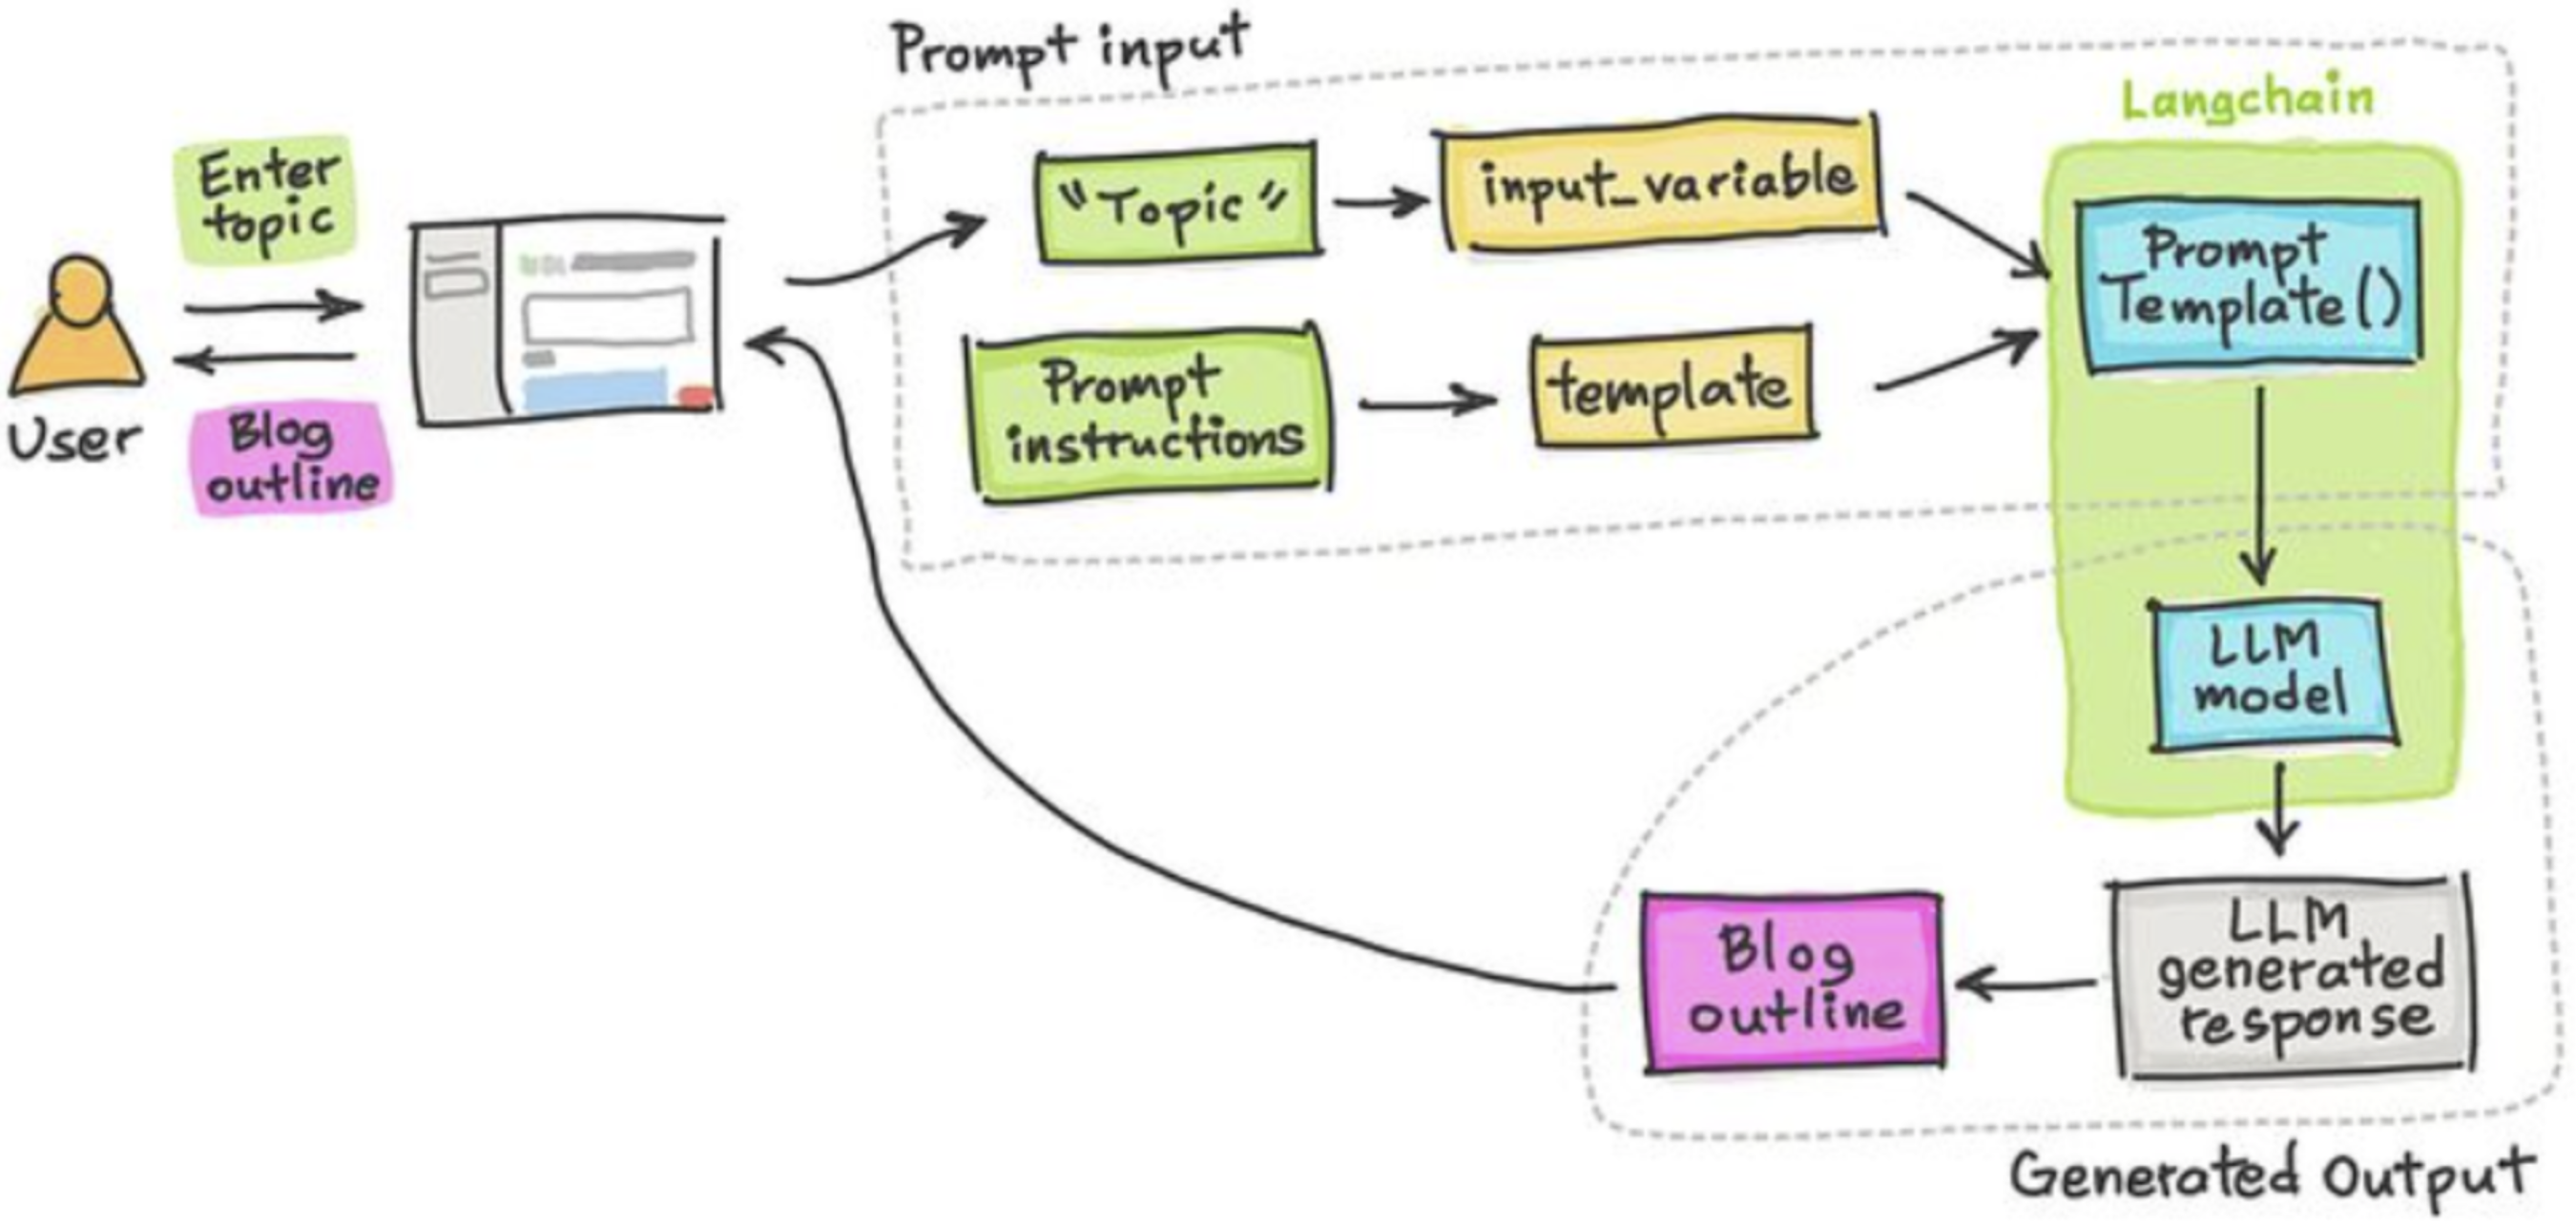

## 사용 상황:
- Chat 모델(OpenAI GPT, Claude 등)을 사용할 때
- system/human 메시지를 구분해 명확한 역할을 부여할 때

## 개념
- Chat 모델용 템플릿 (gpt-3.5-turbo, gpt-4, Claude, Gemini 등)
- 여러 역할(Role: system, human, ai) 메시지를 조합해서 프롬프트 구성
- PromptTemplate보다 구조화된 대화 형식

## Template 비교 

| 구분                        | 사용 목적          | 구조                   | 예시 기반 | 주로 사용하는 모델 | 대표 용도        |
| ------------------------- | -------------- | -------------------- | ----- | ---------- | ------------ |
| **PromptTemplate**        | 단일 텍스트 프롬프트    | 문자열                  | ❌     | 텍스트 LLM    | 단순 질의        |
| **ChatPromptTemplate**    | 대화형 프롬프트       | 메시지 목록(system/human) | ❌     | Chat LLM   | 챗봇, 대화형 질의   |
| **FewShotPromptTemplate** | 예시 포함 학습형 프롬프트 | 문자열 + 예시 리스트         | ✅     | 모든 LLM     | 예시 학습, 패턴 생성 |


# 예제 

## ChatPromptTemplate

In [2]:
from langchain.prompts import ChatPromptTemplate
from langchain_core.messages import SystemMessage
from langchain_core.prompts import HumanMessagePromptTemplate

# 시스템과 휴먼 역할을 정의한 채팅 프롬프트 템플릿 생성
chat_prompt = ChatPromptTemplate(
    messages=[
        # system 역할
        SystemMessage(
            content=(
                "당신은 친근하고 도움이 되는 AI 어시스턴트입니다. 항상 한국어로 답변해주세요."
            )
        ),
        # human 역할
        HumanMessagePromptTemplate.from_template("""
            {user_input}
        """),
    ]
)


In [3]:
chat_prompt.input_variables

['user_input']

## Ollama Model

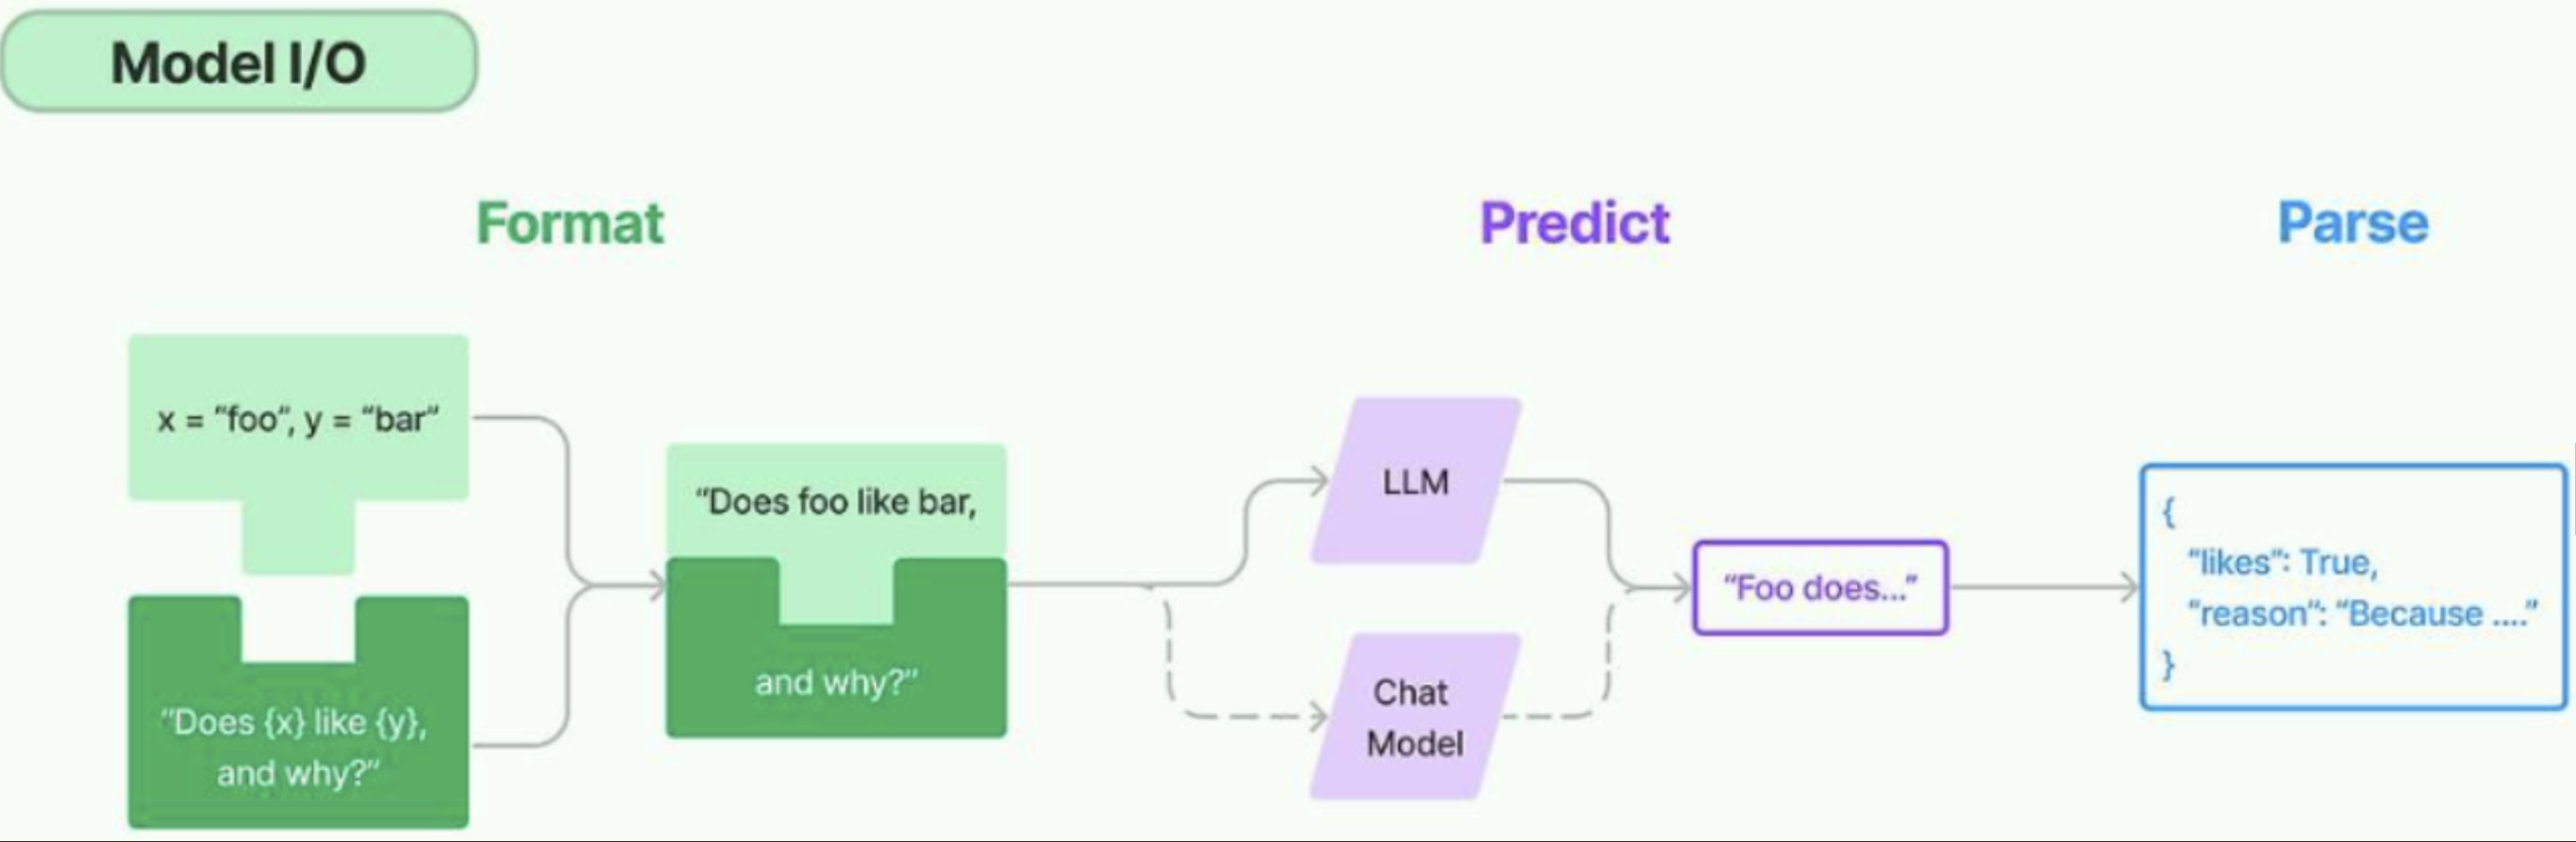

### Ollama 확인 
```shell
ollama list
```

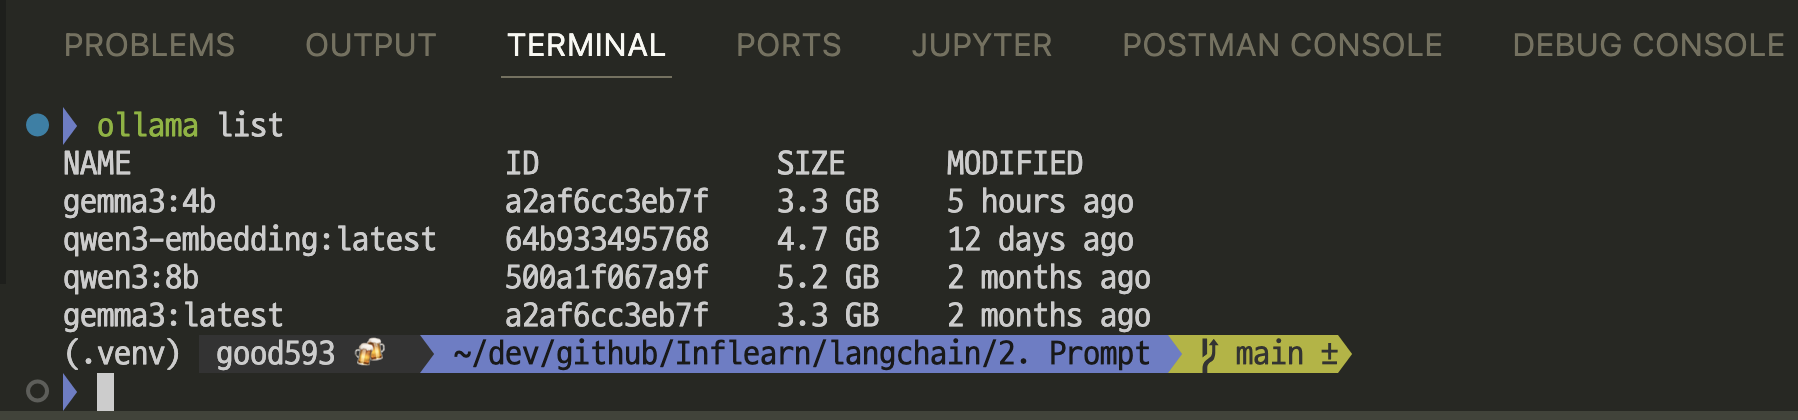

### OllamaLLM

In [ ]:
from langchain_ollama.chat_models import ChatOllama 

model = ChatOllama(
    model="gemma3:4b",
    temperature=0.1,
    top_p=1.0,
    num_predict=256,
    keep_alive="5m"
)

## LangChain Expression Language (LCEL)
- LCEL은 LangChain에서 **체인(Chain)** 을 선언적으로 구성하기 위한 언어입니다.
- LangChain에서 **Chain**은 LLM 애플리케이션의 “작업 단계를 연결(Chain)”하는 핵심 개념입니다.
- 이 과정을 “체인(chain)” 형태로 구성하면 재사용성과 유지보수가 좋아집니다.
```
사용자 입력 → 프롬프트 구성 → LLM 호출 → 결과 반환
```

In [5]:
# chain 생성
chain = chat_prompt | model

In [6]:
# chain 호출 
response = chain.invoke({
    "user_input": "중력에 대해 설명해줘."
})


In [ ]:
# 결과 확인 
print(response.content)

안녕하세요! 중력에 대해 설명해 드릴게요. 😊

**중력은 무엇일까요?**

중력은 물체들이 서로 끌어당기는 힘이에요. 이 힘 때문에 우리가 땅에 발을 붙이고 걷고, 사과가 나무에서 떨어지는 현상이 일어나는 거랍니다. 

**좀 더 자세히 알아볼까요?**

*   **뉴턴의 중력 법칙:** 17세기 아이작 뉴턴은 중력을 설명하는 법칙을 만들었어요. 이 법칙에 따르면, 두 물체 사이의 중력은 두 물체의 질량의 곱에 비례하고, 두 물체 사이의 거리의 제곱에 반비례한다는 것을 밝혀냈습니다. 즉, 질량이 클수록, 그리고 거리가 멀수록 중력은 더 강해지는 거죠.
*   **중력의 원인:** 중력은 질량을 가진 모든 물체에 의해 발생합니다. 지구와 같은 거대한 물체일수록 중력이 강하게 작용합니다.
*   **중력의 역할:** 중력은 우주에서 별, 행성, 혜성 등이 서로 묶여서 태양계와 은하를 형성하는 데 중요한 역할을 합니다
